In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("Data/final_clean_data.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45155 entries, 0 to 45154
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MONTH                      45155 non-null  int64  
 1   DAY_OF_MONTH               45155 non-null  int64  
 2   DAY_OF_WEEK                45155 non-null  int64  
 3   OP_UNIQUE_CARRIER          45155 non-null  object 
 4   ORIGIN                     45155 non-null  object 
 5   ORIGIN_STATE_ABR           45155 non-null  object 
 6   DEST                       45155 non-null  object 
 7   DEST_STATE_ABR             45155 non-null  object 
 8   CRS_DEP_TIME               45155 non-null  float64
 9   DEP_DELAY                  45155 non-null  float64
 10  DEP_DELAY_NEW              45155 non-null  float64
 11  DEP_DEL15                  45155 non-null  float64
 12  DEP_DELAY_GROUP            45155 non-null  float64
 13  CRS_ARR_TIME               45155 non-null  flo

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,HourlyVisibility,HourlyWindSpeed
count,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000
mean,5.046728,15.877489,3.971321,13.585353,0.125833,3.996368,0.117418,-0.504241,15.123422,183.310597,1175.492703,5.098970,42.800066,59.471664,57.692747,9.810818,8.246529
std,0.808438,8.780866,2.005020,5.287004,10.457920,7.926741,0.321921,0.764952,5.585735,84.569100,732.185970,2.955206,6.723190,9.337098,18.536586,0.983229,3.873726
min,4.000000,1.000000,1.000000,0.080000,-27.000000,0.000000,0.000000,-2.000000,0.020000,49.000000,93.000000,1.000000,5.000000,30.000000,11.000000,0.000000,0.000000
25%,4.000000,8.000000,2.000000,9.080000,-7.000000,0.000000,0.000000,-1.000000,11.080000,125.000000,679.000000,3.000000,39.000000,53.000000,44.000000,10.000000,6.000000
50%,5.000000,16.000000,4.000000,12.970000,-3.000000,0.000000,0.000000,-1.000000,15.680000,166.000000,978.000000,4.000000,43.000000,58.000000,59.000000,10.000000,8.000000
75%,6.000000,23.000000,6.000000,17.900000,4.000000,4.000000,0.000000,0.000000,19.220000,244.000000,1721.000000,7.000000,48.000000,65.000000,71.000000,10.000000,10.000000
max,6.000000,31.000000,7.000000,23.980000,35.000000,35.000000,1.000000,2.000000,23.980000,411.000000,2724.000000,11.000000,60.000000,102.000000,100.000000,10.000000,30.000000


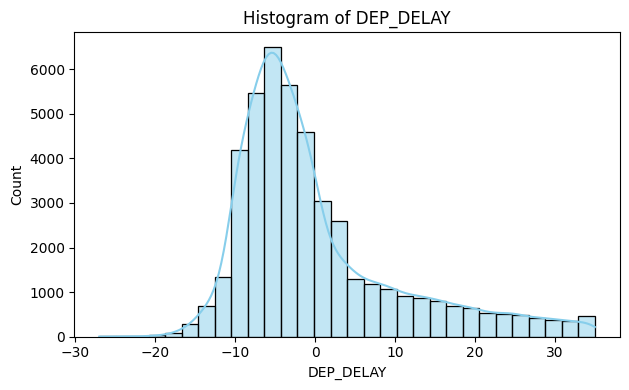

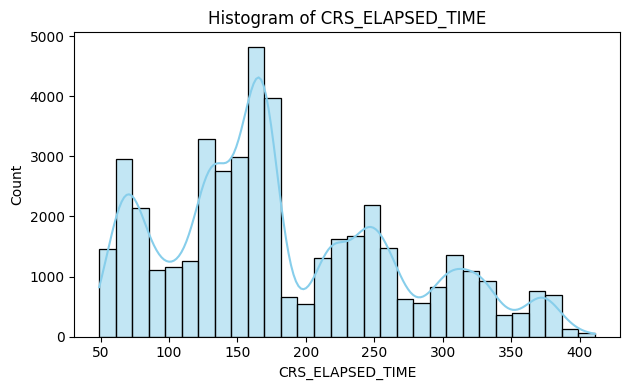

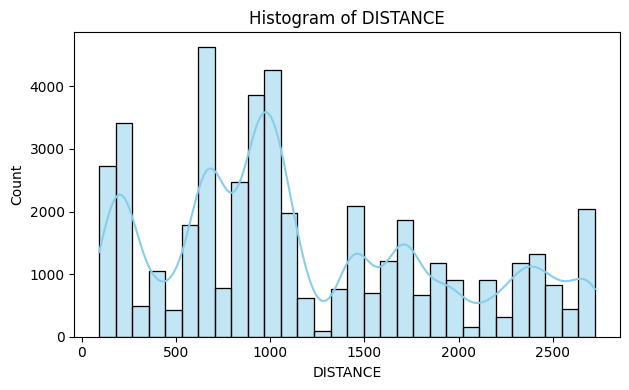

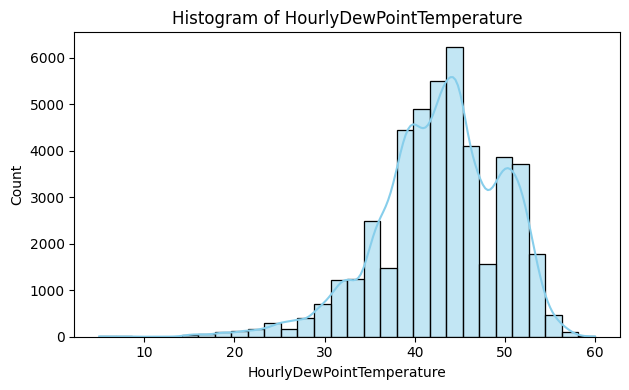

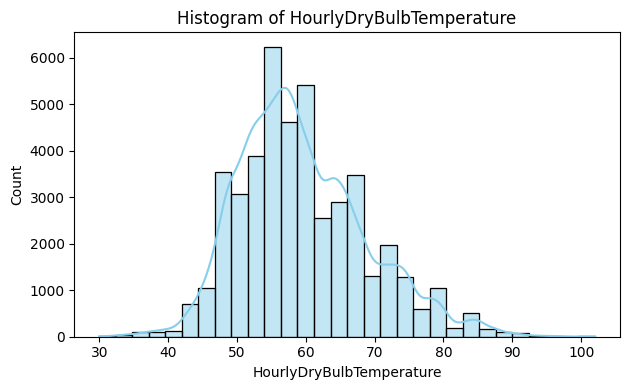

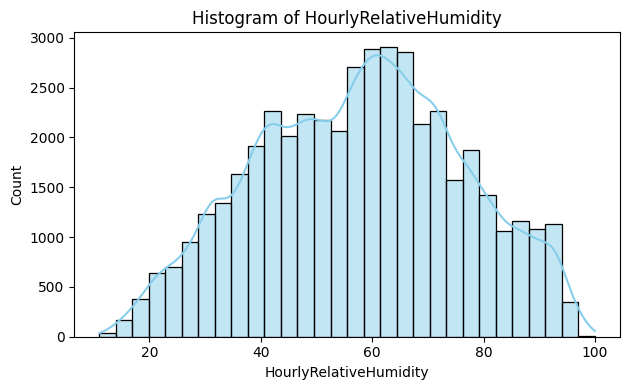

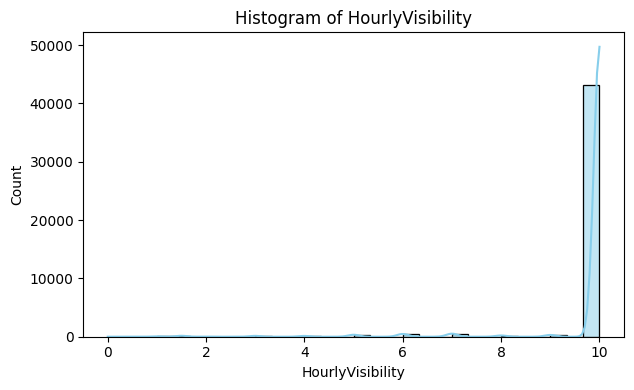

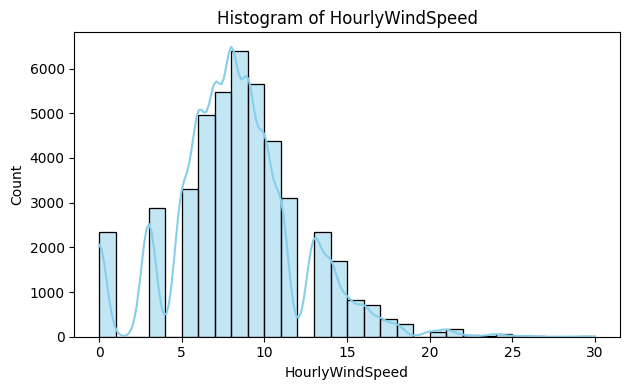

In [3]:
numeric_features = [
    "DEP_DELAY",
    "CRS_ELAPSED_TIME",
    "DISTANCE",
    "HourlyDewPointTemperature",
    "HourlyDryBulbTemperature",
    "HourlyRelativeHumidity",
    "HourlyVisibility",
    "HourlyWindSpeed"
]

for col in numeric_features:
    plt.figure(figsize=(12,4))
    
    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[col].dropna(), bins=30, kde=True, color="skyblue")
    plt.title(f'Histogram of {col}', fontsize=12)
    plt.xlabel(col)
        
    plt.tight_layout()
    plt.show()

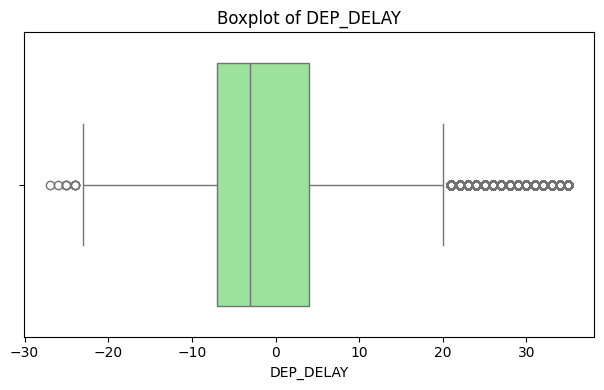

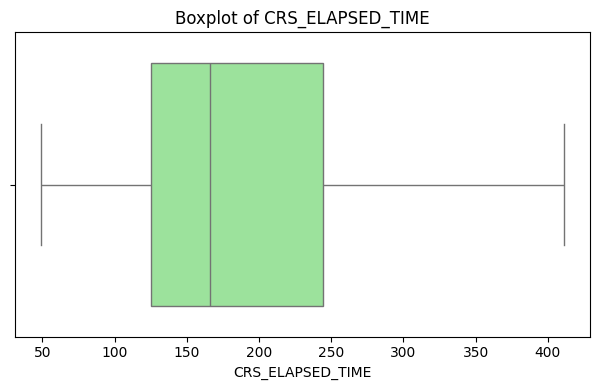

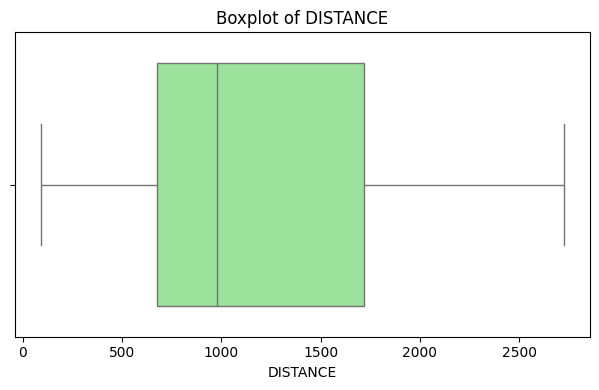

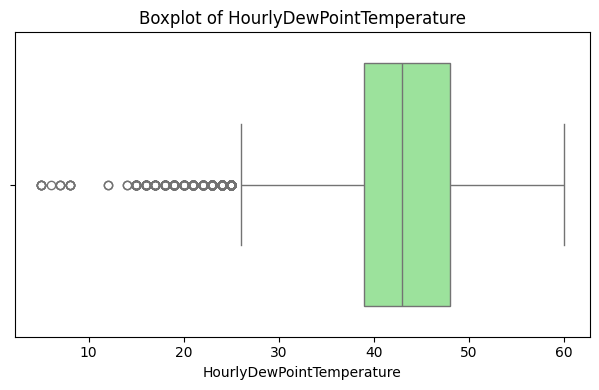

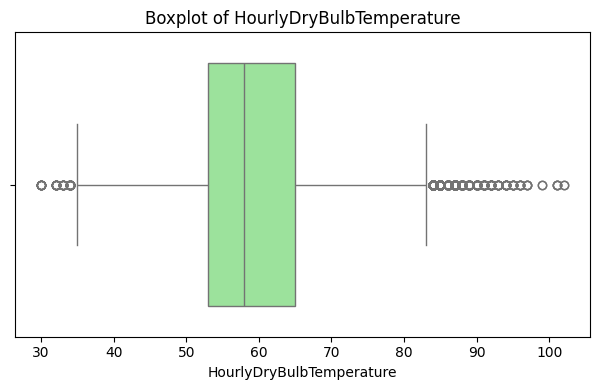

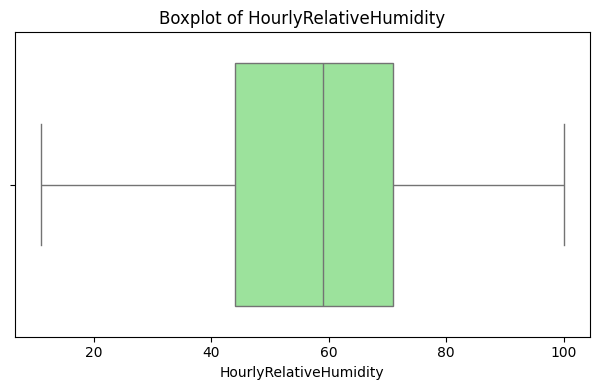

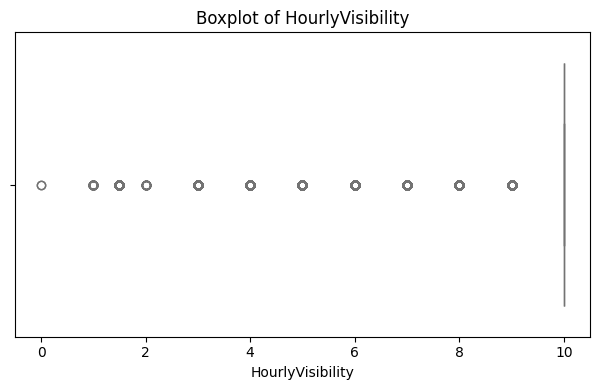

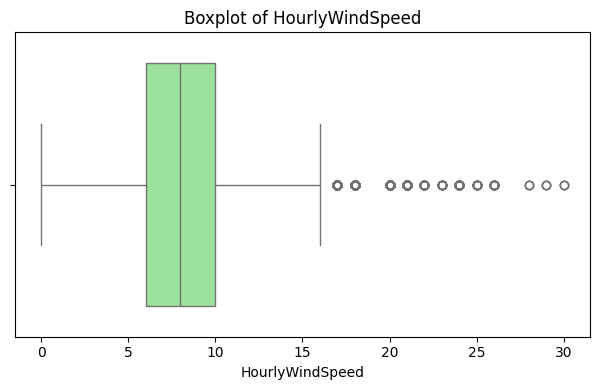

In [4]:
for col in numeric_features:
    plt.figure(figsize=(12,4))
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col].dropna(), color="lightgreen")
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()

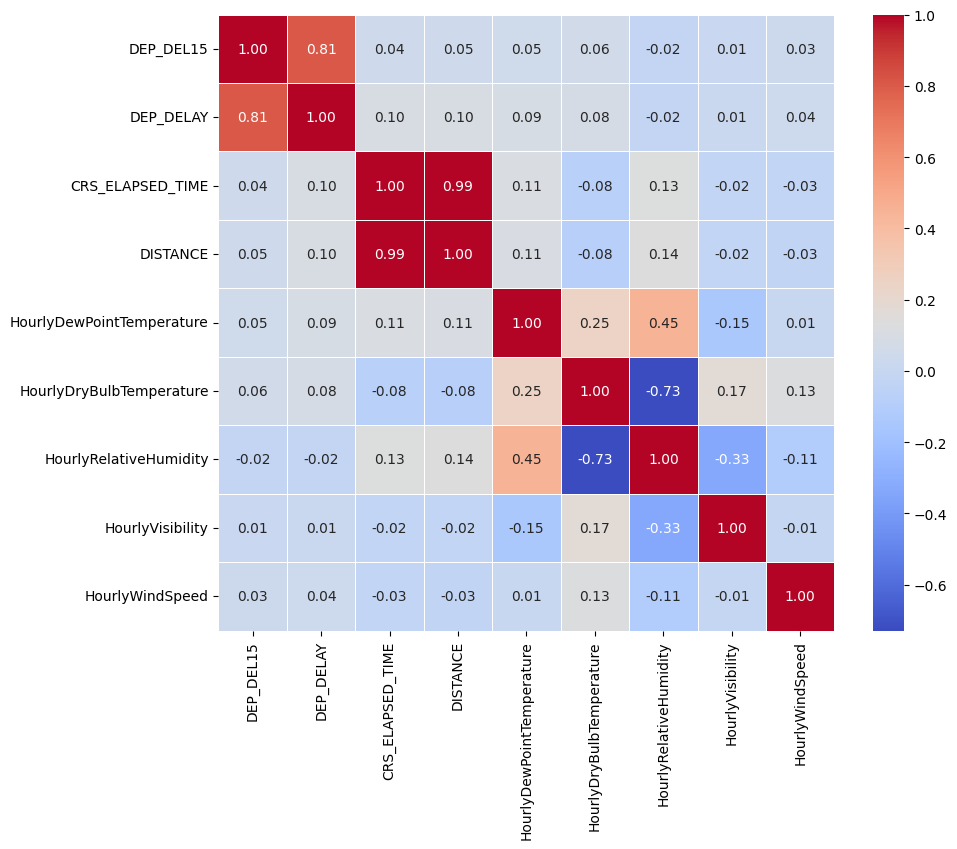

In [5]:
# --- Numeric features ---
corr_features = [
    "DEP_DEL15",
    "DEP_DELAY",
    "CRS_ELAPSED_TIME",
    "DISTANCE",
    "HourlyDewPointTemperature",
    "HourlyDryBulbTemperature",
    "HourlyRelativeHumidity",
    "HourlyVisibility",
    "HourlyWindSpeed"
]

# Compute the correlation matrix
corr_matrix = df[corr_features].corr(method="pearson")

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True,
            linewidths=0.5, square=True)
plt.show()

#### Does departure delay vary by distance group?

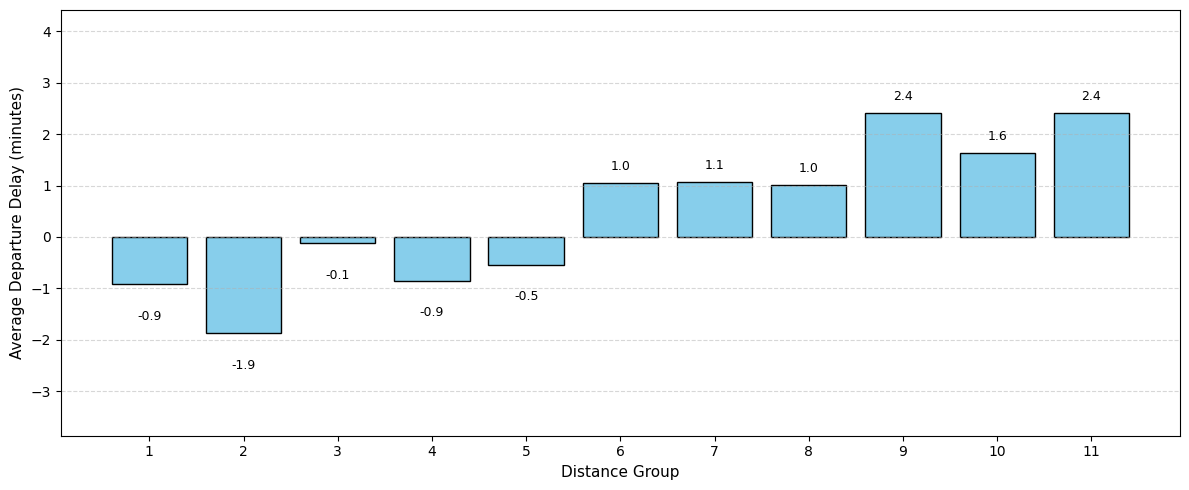

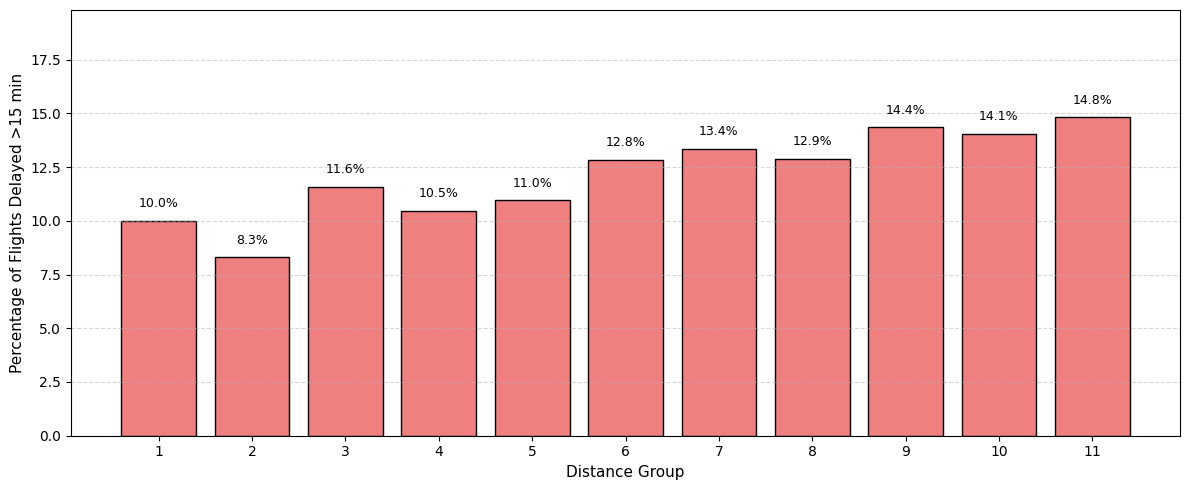

In [6]:
dist_stats = (
    df.groupby("DISTANCE_GROUP")
      .agg(
          AVG_DEP_DELAY=("DEP_DELAY", "mean"),  # Average departure delay (minutes)
          PCT_DELAYED_15=("DEP_DEL15", "mean"), # % of flights delayed >15 minutes
          NUM_FLIGHTS=("DEP_DELAY", "count")    # Number of flights in each group
      )
      .reset_index()
)

# Average Departure Delay by Distance Group
plt.figure(figsize=(12, 5))
bars = plt.bar(dist_stats["DISTANCE_GROUP"],
               dist_stats["AVG_DEP_DELAY"],
               color="skyblue",
               edgecolor="black")

for bar, val in zip(bars, dist_stats["AVG_DEP_DELAY"]):
    ha = 'center'
    va = 'bottom' if val >= 0 else 'top'
    plt.text(bar.get_x() + bar.get_width()/2,
             val + (0.2 if val >= 0 else -0.5),
             f"{val:.1f}",
             ha=ha, va=va, fontsize=9, color="black")

plt.xlabel("Distance Group", fontsize=11)
plt.ylabel("Average Departure Delay (minutes)", fontsize=11)
plt.xticks(dist_stats["DISTANCE_GROUP"])
plt.grid(axis='y', linestyle='--', alpha=0.5)

ymin, ymax = dist_stats["AVG_DEP_DELAY"].min(), dist_stats["AVG_DEP_DELAY"].max()
plt.ylim(ymin - 2, ymax + 2)

plt.tight_layout()
plt.show()

# Percentage of Flights Delayed >15 min
plt.figure(figsize=(12, 5))
bars = plt.bar(dist_stats["DISTANCE_GROUP"],
               dist_stats["PCT_DELAYED_15"] * 100,
               color="lightcoral",
               edgecolor="black")

for bar, val in zip(bars, dist_stats["PCT_DELAYED_15"] * 100):
    plt.text(bar.get_x() + bar.get_width()/2,
             val + 0.5,
             f"{val:.1f}%",
             ha="center", va="bottom", fontsize=9, color="black")

plt.xlabel("Distance Group", fontsize=11)
plt.ylabel("Percentage of Flights Delayed >15 min", fontsize=11)
plt.xticks(dist_stats["DISTANCE_GROUP"])
plt.ylim(0, (dist_stats["PCT_DELAYED_15"]*100).max() + 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

#### How does low visibility affect departure delays?

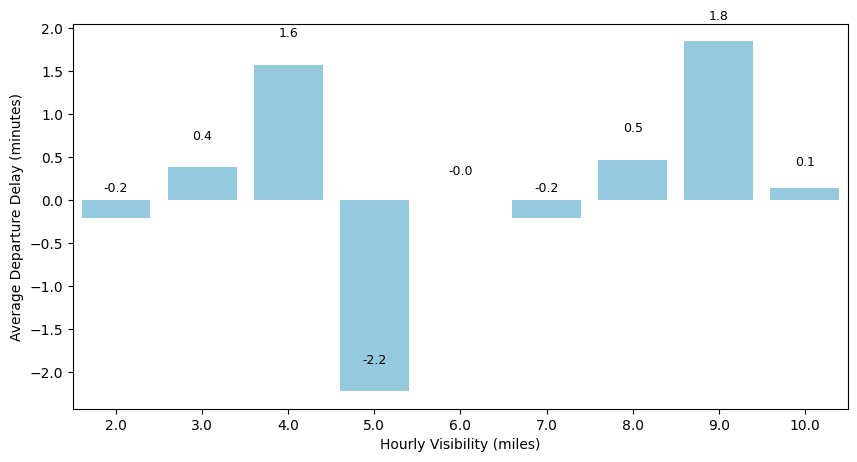

In [7]:
# Average Departure Delay by Visibility
avg_delay_visibility = (
    df[df["HourlyVisibility"] >= 2]
    .groupby("HourlyVisibility")["DEP_DELAY"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,5))
sns.barplot(x="HourlyVisibility", y="DEP_DELAY", data=avg_delay_visibility, color="skyblue")
for i, v in enumerate(avg_delay_visibility["DEP_DELAY"].round(1)):
    plt.text(i, v+0.3, str(v), ha="center", fontsize=9)
plt.xlabel("Hourly Visibility (miles)")
plt.ylabel("Average Departure Delay (minutes)")
plt.show()

### Bỏ

#### Do stronger winds increase departure delays?

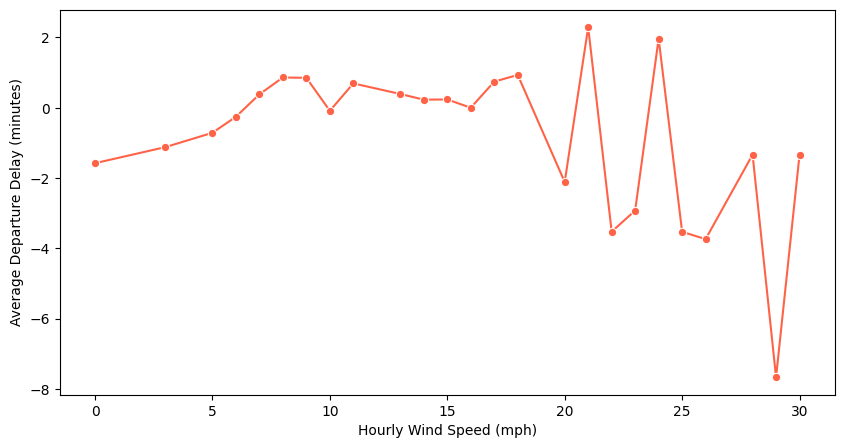

In [8]:
# Average Departure Delay vs Wind Speed
avg_delay_wind = df.groupby("HourlyWindSpeed")["DEP_DELAY"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x="HourlyWindSpeed", y="DEP_DELAY", data=avg_delay_wind, marker="o", color="tomato")
plt.xlabel("Hourly Wind Speed (mph)")
plt.ylabel("Average Departure Delay (minutes)")
plt.show()

### Bỏ

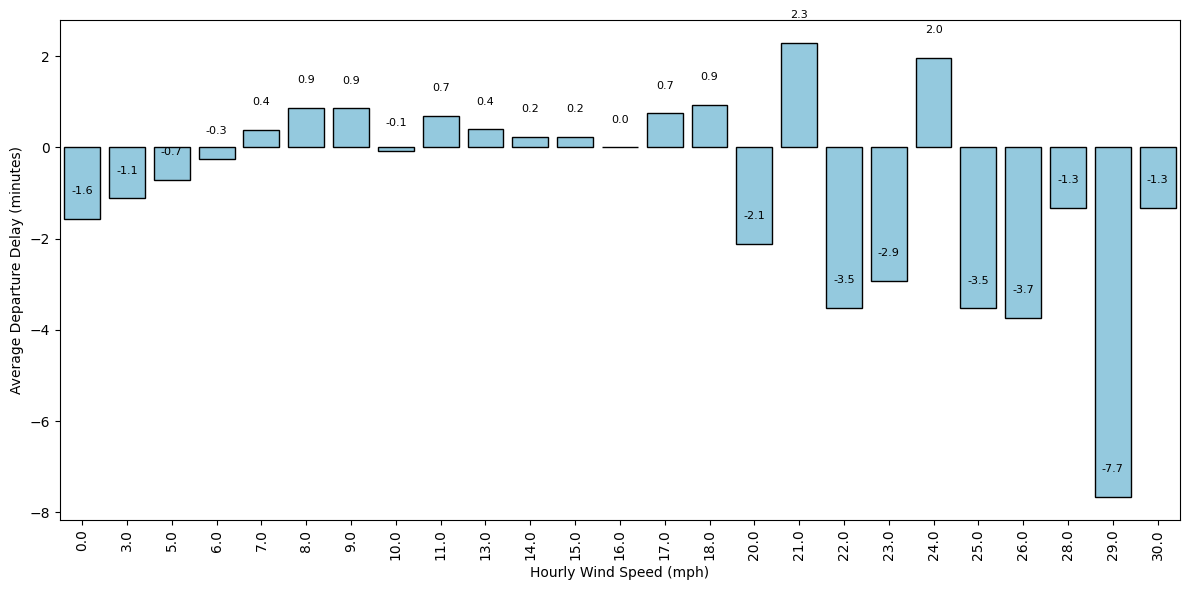

In [9]:
# Average Departure Delay by Wind Speed
avg_delay_wind = df.groupby("HourlyWindSpeed")["DEP_DELAY"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x="HourlyWindSpeed", y="DEP_DELAY", data=avg_delay_wind,
            color="skyblue", edgecolor="black")

for index, row in avg_delay_wind.iterrows():
    plt.text(index, row.DEP_DELAY + 0.5, f"{row.DEP_DELAY:.1f}", ha="center", va="bottom", fontsize=8)

plt.xlabel("Hourly Wind Speed (mph)")
plt.ylabel("Average Departure Delay (minutes)")
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()


### Bỏ

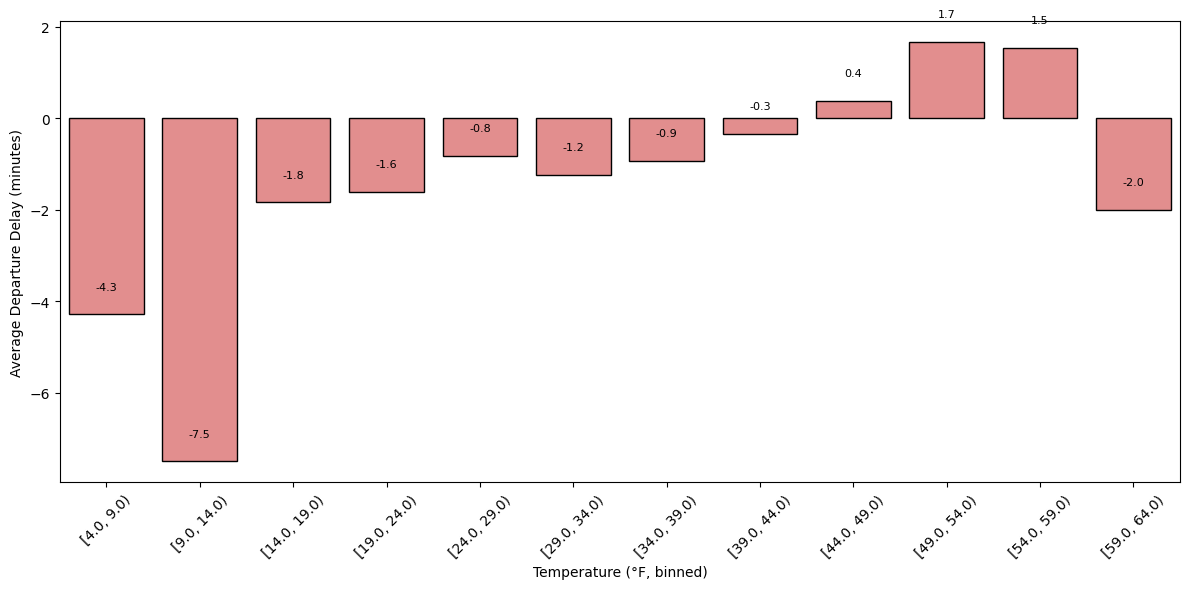

In [10]:
# Average Departure Delay by Temperature (5°F bins)
bin_edges = np.arange(df["HourlyDewPointTemperature"].min()-1, 
                      df["HourlyDewPointTemperature"].max()+5, 5)  # chia mỗi 5°F
df["TempBin"] = pd.cut(df["HourlyDewPointTemperature"], bins=bin_edges, right=False)

temp_stats = (
    df.groupby("TempBin", observed=True)["DEP_DELAY"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(12,6))
ax = sns.barplot(x="TempBin", y="DEP_DELAY", 
                 data=temp_stats, color="lightcoral", edgecolor="black")

for i, row in temp_stats.iterrows():
    ax.text(i, row.DEP_DELAY + 0.5, f"{row.DEP_DELAY:.1f}", 
            ha="center", va="bottom", fontsize=8)

plt.xlabel("Temperature (°F, binned)")
plt.ylabel("Average Departure Delay (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Bỏ
